In [15]:
# I will test with the D-J algorithm with some functions
import numpy as np

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, BasicAer, execute, IBMQ
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor

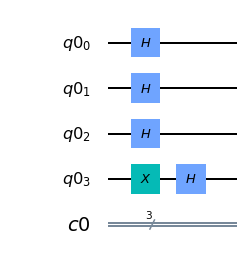

In [2]:
# Building the circuit
n = 3 # number of input qb
qr = QuantumRegister(n + 1) # n inputs and 1 output
cr = ClassicalRegister(n)
circ = QuantumCircuit(qr, cr)
circ.x(n)
circ.h(range(n + 1))
circ.draw(output = 'mpl')

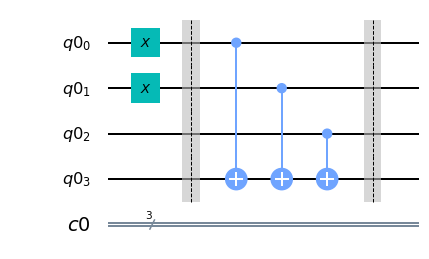

In [3]:
# Building the balanced oracle
uf = QuantumCircuit(qr, cr)
input = '110' # This is a balanced input for my Uf
for i in range(len(input)):
    if input[i] == '1': 
        uf.x(i)
uf.barrier()
for i in range(n):
    uf.cx(i, n)
uf.barrier()
uf.draw(output = 'mpl')

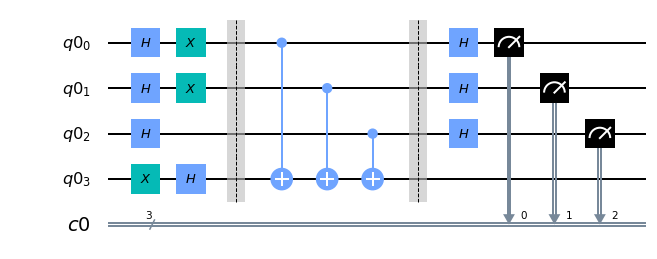

In [4]:
# Adding the Uf to the circuit and completing the circuit
circ = circ + uf
for i in range(n):
    circ.h(i)
for i in range(n):
    circ.measure(i, i)
circ.draw(output = 'mpl')

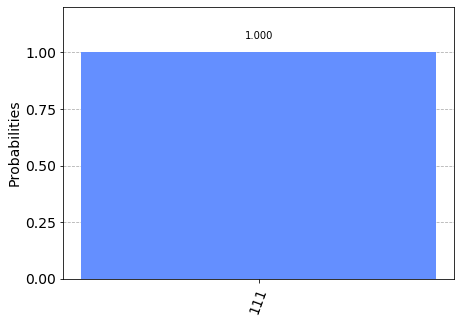

In [5]:
# Ploting the simulation
backend = BasicAer.get_backend('qasm_simulator')
counts = execute(circ, backend=backend, shots=1024).result().get_counts()
plot_histogram(counts)

In [13]:
# Trying a real IBM device
IBMQ.load_account()
provider = IBMQ.get_provider(group='open')
backend = provider.get_backend('ibmq_vigo')

ibmqfactory.load_account:WARNING:2020-05-30 23:54:51,381: Credentials are already in use. The existing account in the session will be replaced.


In [ ]:
job = execute(circ, backend=backend, shots=1024)
job_monitor(job)

Job Status: job is queued (4)     